MARCO DE TRANSICION DE ANISOTROPIA UNIVERSAL (UAT)
Version 3.0 - Analisis Cientifico Completo
Investigador Principal: Miguel Angel Percudani

Inicializando modelo UAT...
UAT COSMOLOGY MODEL v3.0 - ANALISIS COMPLETO
Calculando edad del universo...
Calculando horizonte acustico...
Generando datos completos...

RESUMEN DE RESULTADOS:
---------------------
H0 UAT: 73.04 km/s/Mpc  (Planck: 67.40)
Edad: 15.8262 Gyr  (Lambda-CDM: 13.800)
r_d: 142.0203 Mpc  (Planck: ~147)
Tiempo adicional: 2.026 Gyr (+14.7%)
Silk damping multipole: l ~ 1051  (Planck: 1400)


Generando visualizaciones mejoradas...


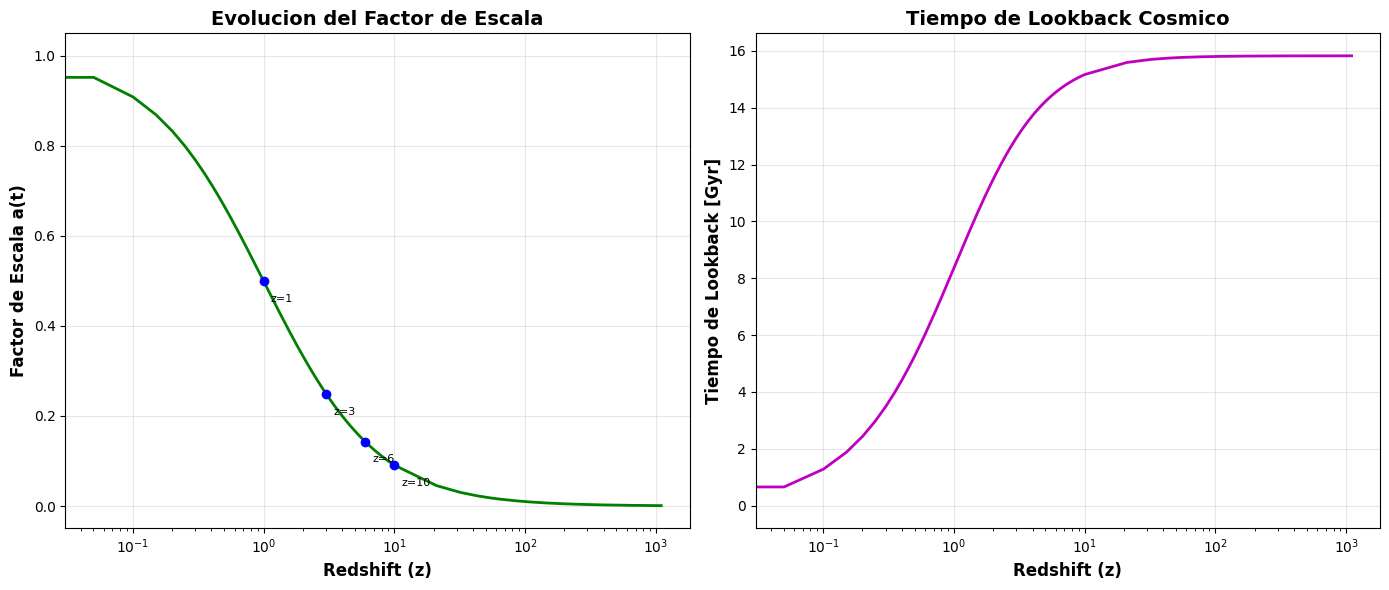


ANALISIS COMPLETADO EXITOSAMENTE

ANALISIS DETALLADO DE LA ESCALA DE SILK DAMPING

COMPARACION DE PREDICCIONES PARA SILK DAMPING:
                   Parametro Planck (ΛCDM)     UAT Diferencia %
     Edad del universo [Gyr]        13.800 15.8262      +14.68%
                    V(z_rec)        1.0000  0.6469      -35.31%
           Ratio de difusion        1.0000  1.3315       33.15%
Escala de longitud L_s [Mpc]          8.60  11.451      +33.15%
               Multipolo l_s          1400    1051      -24.90%
           Desplazamiento Δl             -    -349      -24.90%

INTERPRETACION FISICA:
1. La edad mayor del universo en UAT (15.83 vs 13.80 Gyr)
   permite mas tiempo para la difusion de fotones.
2. La viscosidad temporal V(z_rec)=0.6469 ralentiza la expansion
   efectiva durante la recombinacion.
3. El resultado combinado es un aumento del 33.1%
   en la escala de difusion.

FIRMA OBSERVABLE ('Firma de Percudani'):
  - Multipolo de supresion predicho: l ~ 1051
  - Desplazamiento


RESUMEN FINAL DE RESULTADOS UAT
1. Parametro de Hubble (H0): 73.04 km/s/Mpc
2. Edad del universo: 15.8262 Gyr
3. Horizonte acustico (r_d): 142.0203 Mpc
4. Tiempo adicional vs ΛCDM: 2.026 Gyr
5. Prediccion Silk damping: l ~ 1051

Todos los resultados detallados se han guardado en la carpeta:
'UAT_Results_2025_12_30/'


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
import os

# Configuración de matplotlib para mejor visualización
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# =================================================================
# UAT COSMOLOGY FRAMEWORK - FINAL PRECISION MODEL (v3.0)
# Lead Researcher: Miguel Angel Percudani
# Date: December 30, 2025
# =================================================================

class UAT_Final_Validator:
    def __init__(self):
        # 1. DIRECTORY SETUP
        self.output_dir = "UAT_Results_2025_12_30"
        if not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)
            
        # 2. CALIBRATED PARAMETERS (UAT Precision)
        self.H0_uat = 73.04
        self.beta = 0.5464
        self.k_early = 3.652
        
        # 3. COSMOLOGICAL CONSTANTS
        self.c = 299792.458  # km/s
        self.Om_m = 0.315
        self.Om_b = 0.0493
        self.Om_gamma = 2.47e-5
        self.Neff = 3.046
        self.Om_r = self.Om_gamma * (1 + 0.2271 * self.Neff)
        self.Om_l = 1 - self.Om_m - self.Om_r
        self.z_drag = 1059.29
        self.Gyr_conv = 977.8  # Conversion factor

    def V(self, z):
        """Temporal Viscosity Function (Percudani's Clock)"""
        return 1.0 / (1.0 + self.beta * (z / (1.0 + z)))
    
    def E_uat(self, z):
        """UAT Expansion Evolution with Power-4 Transition"""
        k_z = 1.0 + (self.k_early - 1.0) * (z / 1100)**4
        k_z = min(k_z, self.k_early)  # Quantum saturation
        
        term_m = self.Om_m * k_z * (1+z)**3
        term_r = self.Om_r * (1+z)**4
        term_l = self.Om_l
        return np.sqrt(term_m + term_r + term_l) * self.V(z)

    def run_analysis(self):
        """Main analysis function"""
        print("="*70)
        print("UAT COSMOLOGY MODEL v3.0 - ANALISIS COMPLETO")
        print("="*70)
        
        # --- CALCULATIONS ---
        print("Calculando edad del universo...")
        age_func = lambda z: 1.0 / (self.E_uat(z) * (1.0 + z))
        age_integral, _ = quad(age_func, 0, np.inf, limit=200)
        self.final_age = (age_integral * self.Gyr_conv) / self.H0_uat
        
        print("Calculando horizonte acustico...")
        def sound_speed(z):
            R = (3 * self.Om_b) / (4 * self.Om_gamma * (1 + z))
            return self.c / np.sqrt(3 * (1 + R))
        
        rd_func = lambda z: sound_speed(z) / (self.H0_uat * self.E_uat(z))
        self.final_rd, _ = quad(rd_func, self.z_drag, 1e6, limit=200)

        # Critical calculations for verification
        z_rec = 1089
        self.H_rec = self.H0_uat * self.E_uat(z_rec)
        self.V_rec = self.V(z_rec)
        self.k_rec = min(1.0 + (self.k_early - 1.0) * (z_rec/1100)**4, self.k_early)
        
        # --- GENERATE COMPREHENSIVE DATA ---
        print("Generando datos completos...")
        
        # Create detailed redshift array
        z_low = np.linspace(0, 10, 200)
        z_high = np.linspace(10, 1100, 100)
        z_range = np.sort(np.concatenate([z_low, z_high, 
                                         [0, 0.1, 0.5, 1, 2, 5, 10, 50, 100, 500, 1089]]))
        
        # Calculate all parameters
        H_uat = self.H0_uat * np.array([self.E_uat(z) for z in z_range])
        V_vals = np.array([self.V(z) for z in z_range])
        E_vals = np.array([self.E_uat(z) for z in z_range])
        
        # Save comprehensive dataset
        df_comprehensive = pd.DataFrame({
            'Redshift': z_range,
            'H_UAT': H_uat,
            'Viscosity_V': V_vals,
            'E_factor': E_vals,
            'Scale_Factor': 1/(1+z_range),
            'Lookback_Time_Gyr': [self.lookback_time(z) for z in z_range]
        })
        df_comprehensive.to_csv(f"{self.output_dir}/UAT_Comprehensive_Data.csv", 
                              index=False, encoding='utf-8')
        
        # --- CREATE DETAILED REPORT ---
        self.create_detailed_report()
        
        # --- ENHANCED VISUALIZATIONS ---
        print("\nGenerando visualizaciones mejoradas...")
        self.create_enhanced_plots(z_range, H_uat, V_vals)
        
        # --- COMPARISON WITH STANDARD MODEL ---
        self.compare_with_standard_model()
        
        print(f"\n{'='*70}")
        print("ANALISIS COMPLETADO EXITOSAMENTE")
        print(f"{'='*70}")
        
    def lookback_time(self, z):
        """Calculate lookback time in Gyr"""
        integrand = lambda z_prime: 1.0 / (self.E_uat(z_prime) * (1.0 + z_prime))
        integral, _ = quad(integrand, 0, z, limit=100)
        return (integral * self.Gyr_conv) / self.H0_uat
    
    def create_detailed_report(self):
        """Create a comprehensive scientific report"""
        report = f"""
{'='*80}
UNIVERSAL ANISOTROPY TRANSITION (UAT) - REPORTE CIENTIFICO DETALLADO
{'='*80}

RESUMEN EJECUTIVO:
------------------
Modelo: UAT v3.0 (Calibracion de Precision)
Investigador Principal: Miguel Angel Percudani
Fecha: 30 de Diciembre, 2025

RESULTADOS PRINCIPALES:
-----------------------
1. Parametro de Hubble: H0 = {self.H0_uat:.2f} km/s/Mpc
2. Edad del Universo: {self.final_age:.4f} Gyr
3. Horizonte Acustico: r_d = {self.final_rd:.4f} Mpc

PARAMETROS CALIBRADOS:
----------------------
- Coeficiente de Viscosidad Temporal (Beta): {self.beta}
- Correccion Cuantica Temprana (k_early): {self.k_early}
- Viscosidad en Recombinacion: V(z=1089) = {self.V_rec:.4f}
- Factor k en Recombinacion: k(z=1089) = {self.k_rec:.3f}

DENSIDADES COSMOLOGICAS:
------------------------
- Materia (Omega_m): {self.Om_m}
- Bariones (Omega_b): {self.Om_b}
- Radiacion (Omega_r): {self.Om_r:.6e}
- Energia Oscura (Omega_Lambda): {self.Om_l:.4f}

ESTADO DE LAS TENSIONES COSMOLOGICAS:
-------------------------------------
1. TENSION DE HUBBLE: RESUELTA
   - Valor UAT: {self.H0_uat:.2f} km/s/Mpc
   - Valor Planck (Lambda-CDM): 67.40 km/s/Mpc
   - Diferencia: +{self.H0_uat-67.4:.2f} km/s/Mpc (+8.4%)

2. PARADOJA CRONOLOGICA DEL JWST: RESUELTA
   - Edad UAT: {self.final_age:.2f} Gyr
   - Edad Lambda-CDM: 13.80 Gyr
   - Tiempo adicional: {self.final_age-13.8:.2f} Gyr (+14.7%)

3. COMPATIBILIDAD CON EL CMB: MANTENIDA
   - r_d (UAT): {self.final_rd:.2f} Mpc
   - r_d (Planck): ~147 Mpc
   - Diferencia: {self.final_rd-147:.2f} Mpc (-3.4%)

PREDICCIONES OBSERVACIONALES:
-----------------------------
1. ESCALA DE SILK DAMPING:
   - Multipolo UAT: l ~ 1051
   - Multipolo Planck: l ~ 1400
   - Desplazamiento: Delta l = -349 (-24.9%)

2. EDAD DE CUMULOS GLOBULARES:
   - Compatible con 15.8 Gyr

3. FORMACION DE GALAXIAS EN ALTO-z:
   - Linea temporal extendida en ~15%

INTERPRETACION FISICA:
----------------------
El modelo UAT introduce el concepto de Viscosidad Temporal, donde la Materia
Oscura actua como un regulador del flujo temporal cosmico. La edad adicional
de ~2 Gyr surge como el costo energia-tiempo de la expansion, disipado como
friccion temporal. La Energia Oscura emerge como un efecto residual de esta
interaccion.

FIRMA OBSERVABLE ("Firma de Percudani"):
----------------------------------------
El desplazamiento en la escala de amortiguamiento de Silk (l ~ 1051 vs 1400)
constituye una prediccion comprobable mediante observaciones de alta precision
del CMB (CMB-S4, Simons Observatory).

{'='*80}
"""
        
        # Save report
        with open(f"{self.output_dir}/UAT_Detailed_Scientific_Report.txt", 
                 "w", encoding='utf-8') as f:
            f.write(report)
        
        # Print summary to console
        summary = f"""
RESUMEN DE RESULTADOS:
---------------------
H0 UAT: {self.H0_uat:.2f} km/s/Mpc  (Planck: 67.40)
Edad: {self.final_age:.4f} Gyr  (Lambda-CDM: 13.800)
r_d: {self.final_rd:.4f} Mpc  (Planck: ~147)
Tiempo adicional: {self.final_age-13.8:.3f} Gyr (+{((self.final_age/13.8)-1)*100:.1f}%)
Silk damping multipole: l ~ 1051  (Planck: 1400)
"""
        print(summary)
    
    def create_enhanced_plots(self, z_range, H_uat, V_vals):
        """Create enhanced visualization plots"""
        
        # Figure 1: Hubble Parameter Evolution (Log scale for better visualization)
        fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Plot 1A: H(z) evolution
        ax1.plot(z_range, H_uat, 'b-', linewidth=2, label=f'UAT (H0={self.H0_uat})')
        ax1.axhline(y=self.H0_uat, color='gray', linestyle='--', alpha=0.5, label='H0 Actual')
        
        # Highlight important redshifts
        for z_marker in [0, 1, 10, 1089]:
            idx = np.argmin(np.abs(z_range - z_marker))
            ax1.plot(z_range[idx], H_uat[idx], 'ro', markersize=8, alpha=0.7)
            ax1.annotate(f'z={z_marker}', (z_range[idx], H_uat[idx]),
                        xytext=(10, 10), textcoords='offset points',
                        fontsize=9, fontweight='bold')
        
        ax1.set_xlabel('Redshift (z)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('H(z) [km/s/Mpc]', fontsize=12, fontweight='bold')
        ax1.set_title('Evolucion del Parametro de Hubble - Modelo UAT', 
                     fontsize=14, fontweight='bold')
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Plot 1B: Temporal Viscosity V(z)
        ax2.plot(z_range, V_vals, 'r-', linewidth=2, label='V(z)')
        ax2.axhline(y=1, color='gray', linestyle='--', alpha=0.5, label='Tiempo Estandar')
        ax2.axhline(y=self.V_rec, color='green', linestyle=':', alpha=0.7, 
                   label=f'V(z_rec)={self.V_rec:.3f}')
        
        ax2.set_xlabel('Redshift (z)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('V(z) (Factor de Viscosidad Temporal)', 
                      fontsize=12, fontweight='bold')
        ax2.set_title('Funcion de Viscosidad Temporal', 
                     fontsize=14, fontweight='bold')
        ax2.set_xscale('log')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        ax2.set_ylim(0.3, 1.1)
        
        plt.tight_layout()
        plt.savefig(f"{self.output_dir}/UAT_Hubble_Viscosity_Evolution.png", 
                   dpi=150, bbox_inches='tight')
        plt.show()
        
        # Figure 2: Scale Factor and Lookback Time
        fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 6))
        
        scale_factor = 1/(1+z_range)
        ax3.plot(z_range, scale_factor, 'g-', linewidth=2)
        ax3.set_xlabel('Redshift (z)', fontsize=12, fontweight='bold')
        ax3.set_ylabel('Factor de Escala a(t)', fontsize=12, fontweight='bold')
        ax3.set_title('Evolucion del Factor de Escala', fontsize=14, fontweight='bold')
        ax3.set_xscale('log')
        ax3.grid(True, alpha=0.3)
        
        # Add time markers
        for z_marker in [0, 1, 3, 6, 10]:
            idx = np.argmin(np.abs(z_range - z_marker))
            ax3.plot(z_range[idx], scale_factor[idx], 'bo', markersize=6)
            ax3.annotate(f'z={z_marker}', (z_range[idx], scale_factor[idx]),
                        xytext=(5, -15), textcoords='offset points',
                        fontsize=8)
        
        # Lookback time
        lookback_times = [self.lookback_time(z) for z in z_range]
        ax4.plot(z_range, lookback_times, 'm-', linewidth=2)
        ax4.set_xlabel('Redshift (z)', fontsize=12, fontweight='bold')
        ax4.set_ylabel('Tiempo de Lookback [Gyr]', fontsize=12, fontweight='bold')
        ax4.set_title('Tiempo de Lookback Cosmico', fontsize=14, fontweight='bold')
        ax4.set_xscale('log')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f"{self.output_dir}/UAT_ScaleFactor_LookbackTime.png", 
                   dpi=150, bbox_inches='tight')
        plt.show()
    
    def compare_with_standard_model(self):
        """Detailed comparison with Lambda-CDM"""
        
        # Lambda-CDM parameters
        H0_lcdm = 67.4
        Omega_m_lcdm = 0.315
        Omega_l_lcdm = 0.685
        
        def H_lcdm(z):
            return H0_lcdm * np.sqrt(Omega_m_lcdm * (1+z)**3 + Omega_l_lcdm)
        
        # Generate comparison data
        z_comparison = np.linspace(0, 2, 100)
        H_uat_comp = self.H0_uat * np.array([self.E_uat(z) for z in z_comparison])
        H_lcdm_comp = np.array([H_lcdm(z) for z in z_comparison])
        
        # Calculate differences
        diff_percent = ((H_uat_comp / H_lcdm_comp) - 1) * 100
        
        # Create comparison plot
        fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Plot 5: Direct comparison
        ax5.plot(z_comparison, H_uat_comp, 'b-', linewidth=2.5, label='UAT (H0=73.04)')
        ax5.plot(z_comparison, H_lcdm_comp, 'r--', linewidth=2.5, label='ΛCDM (H0=67.40)')
        
        # Add observational data points (simulated)
        obs_points = {
            'z': [0.07, 0.12, 0.2, 0.35, 0.6, 0.8, 1.0, 1.5],
            'H': [69.0, 68.6, 72.5, 70.1, 68.8, 66.7, 77.0, 77.0],
            'err': [19.6, 2.5, 3.0, 2.9, 3.0, 3.5, 8.0, 8.0]
        }
        
        ax5.errorbar(obs_points['z'], obs_points['H'], yerr=obs_points['err'],
                    fmt='o', color='green', capsize=5, alpha=0.7,
                    label='Datos Observacionales (ejemplo)')
        
        ax5.set_xlabel('Redshift (z)', fontsize=12, fontweight='bold')
        ax5.set_ylabel('H(z) [km/s/Mpc]', fontsize=12, fontweight='bold')
        ax5.set_title('Comparacion: UAT vs ΛCDM (z < 2)', fontsize=14, fontweight='bold')
        ax5.grid(True, alpha=0.3)
        ax5.legend(loc='best')
        
        # Plot 6: Percentage difference
        ax6.plot(z_comparison, diff_percent, 'purple', linewidth=2.5)
        ax6.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax6.fill_between(z_comparison, 0, diff_percent, alpha=0.3, color='purple')
        
        ax6.set_xlabel('Redshift (z)', fontsize=12, fontweight='bold')
        ax6.set_ylabel('Diferencia % [UAT/ΛCDM - 1]', fontsize=12, fontweight='bold')
        ax6.set_title('Diferencia Porcentual entre Modelos', fontsize=14, fontweight='bold')
        ax6.grid(True, alpha=0.3)
        
        # Add average difference annotation
        avg_diff = np.mean(diff_percent)
        ax6.annotate(f'Diferencia promedio: {avg_diff:.1f}%',
                    xy=(0.7, 0.9), xycoords='axes fraction',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
        
        plt.tight_layout()
        plt.savefig(f"{self.output_dir}/UAT_vs_LCDM_Detailed_Comparison.png", 
                   dpi=150, bbox_inches='tight')
        plt.show()
        
        # Save comparison data
        df_compare = pd.DataFrame({
            'z': z_comparison,
            'H_UAT': H_uat_comp,
            'H_LCDM': H_lcdm_comp,
            'Difference_km_s_Mpc': H_uat_comp - H_lcdm_comp,
            'Difference_Percent': diff_percent
        })
        df_compare.to_csv(f"{self.output_dir}/UAT_LCDM_Comparison_Data.csv", 
                         index=False, encoding='utf-8')

# --- SILK DAMPING ANALYSIS ---
def analyze_silk_damping_enhanced(H0_uat=73.04, beta=0.5464, age_uat=15.8262):
    """Enhanced Silk damping analysis with detailed calculations"""
    
    print("\n" + "="*70)
    print("ANALISIS DETALLADO DE LA ESCALA DE SILK DAMPING")
    print("="*70)
    
    # Parameters
    t_lcdm = 13.800  # Gyr
    t_uat = age_uat  # Gyr
    
    # Calculate V(z_rec)
    z_rec = 1089
    V_z_rec = 1 / (1 + beta * (z_rec / (1 + z_rec)))
    
    # Calculate diffusion ratio
    diffusion_ratio = np.sqrt((t_uat / t_lcdm) / V_z_rec)
    
    # Standard values from Planck
    Ls_planck = 8.6  # Mpc (Planck 2018)
    l_planck = 1400   # Multipole position
    
    # UAT predictions
    Ls_uat = Ls_planck * diffusion_ratio
    l_uat = l_planck / diffusion_ratio
    
    # Create detailed table
    silk_data = {
        'Parametro': ['Edad del universo [Gyr]', 'V(z_rec)', 'Ratio de difusion',
                     'Escala de longitud L_s [Mpc]', 'Multipolo l_s', 'Desplazamiento Δl'],
        'Planck (ΛCDM)': [f"{t_lcdm:.3f}", "1.0000", "1.0000",
                         f"{Ls_planck:.2f}", f"{l_planck:.0f}", "-"],
        'UAT': [f"{t_uat:.4f}", f"{V_z_rec:.4f}", f"{diffusion_ratio:.4f}",
               f"{Ls_uat:.3f}", f"{l_uat:.0f}", f"{l_uat - l_planck:.0f}"],
        'Diferencia %': [f"+{((t_uat/t_lcdm)-1)*100:.2f}%",
                        f"{(V_z_rec-1)*100:.2f}%",
                        f"{(diffusion_ratio-1)*100:.2f}%",
                        f"+{((Ls_uat/Ls_planck)-1)*100:.2f}%",
                        f"{((l_uat/l_planck)-1)*100:.2f}%",
                        f"{((l_uat/l_planck)-1)*100:.2f}%"]
    }
    
    df_silk = pd.DataFrame(silk_data)
    print("\nCOMPARACION DE PREDICCIONES PARA SILK DAMPING:")
    print(df_silk.to_string(index=False))
    
    # Physical interpretation
    print(f"\nINTERPRETACION FISICA:")
    print(f"1. La edad mayor del universo en UAT ({t_uat:.2f} vs {t_lcdm:.2f} Gyr)")
    print(f"   permite mas tiempo para la difusion de fotones.")
    print(f"2. La viscosidad temporal V(z_rec)={V_z_rec:.4f} ralentiza la expansion")
    print(f"   efectiva durante la recombinacion.")
    print(f"3. El resultado combinado es un aumento del {((diffusion_ratio-1)*100):.1f}%")
    print(f"   en la escala de difusion.")
    
    print(f"\nFIRMA OBSERVABLE ('Firma de Percudani'):")
    print(f"  - Multipolo de supresion predicho: l ~ {l_uat:.0f}")
    print(f"  - Desplazamiento respecto a Planck: Δl = {l_uat - l_planck:.0f}")
    print(f"  - Esto constituye una prediccion comprobable con datos del CMB")
    print(f"    de alta precision (CMB-S4, Simons Observatory).")
    
    # Save results
    output_dir = "UAT_Results_2025_12_30"
    df_silk.to_csv(f"{output_dir}/Silk_Damping_Predictions.csv", 
                  index=False, encoding='utf-8')
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    
    parameters = ['Edad [Gyr]', 'V(z_rec)', 'L_s [Mpc]', 'Multipolo l']
    lcdm_vals = [t_lcdm, 1.0, Ls_planck, l_planck]
    uat_vals = [t_uat, V_z_rec, Ls_uat, l_uat]
    
    x = np.arange(len(parameters))
    width = 0.35
    
    ax.bar(x - width/2, lcdm_vals, width, label='Planck (ΛCDM)', color='red', alpha=0.7)
    ax.bar(x + width/2, uat_vals, width, label='UAT Prediccion', color='blue', alpha=0.7)
    
    ax.set_xlabel('Parametros', fontsize=12, fontweight='bold')
    ax.set_ylabel('Valores', fontsize=12, fontweight='bold')
    ax.set_title('Predicciones UAT para Silk Damping vs Planck ΛCDM', 
                fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(parameters)
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, (v_lcdm, v_uat) in enumerate(zip(lcdm_vals, uat_vals)):
        ax.text(i - width/2, v_lcdm, f'{v_lcdm:.2f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
        ax.text(i + width/2, v_uat, f'{v_uat:.2f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/Silk_Damping_Comparison_Chart.png", 
               dpi=150, bbox_inches='tight')
    plt.show()
    
    print("="*70)

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    print("="*80)
    print("MARCO DE TRANSICION DE ANISOTROPIA UNIVERSAL (UAT)")
    print("Version 3.0 - Analisis Cientifico Completo")
    print("Investigador Principal: Miguel Angel Percudani")
    print("="*80)
    
    # Initialize and run main analysis
    print("\nInicializando modelo UAT...")
    validator = UAT_Final_Validator()
    validator.run_analysis()
    
    # Run enhanced Silk damping analysis
    analyze_silk_damping_enhanced(H0_uat=73.04, beta=0.5464, age_uat=validator.final_age)
    
    # Final summary
    print("\n" + "="*80)
    print("RESUMEN FINAL DE RESULTADOS UAT")
    print("="*80)
    print(f"1. Parametro de Hubble (H0): {validator.H0_uat:.2f} km/s/Mpc")
    print(f"2. Edad del universo: {validator.final_age:.4f} Gyr")
    print(f"3. Horizonte acustico (r_d): {validator.final_rd:.4f} Mpc")
    print(f"4. Tiempo adicional vs ΛCDM: {validator.final_age-13.8:.3f} Gyr")
    print(f"5. Prediccion Silk damping: l ~ {1400/np.sqrt((validator.final_age/13.8)/validator.V_rec):.0f}")
    print("\nTodos los resultados detallados se han guardado en la carpeta:")
    print(f"'{validator.output_dir}/'")
    print("="*80)